<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Воронцов К. В. Математические методы обучения по прецедентам. 2012. http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf (разделы 5.2 и 7.1)
- Hastie T., Tibshirani R., Friedman J. The Elements of Statistical Learning. Springer: Data Mining, Inference, and Prediction.  — 2nd ed. — Springer-Verlag. 2009. — 746 p.http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf (глава 14)



**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_fall 496 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2017_496_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Дедлайн жесткий, в том числе помтоу что это ДЗ последнее в курсе. 

<h1 align="center">Вопросы по теории (30%) </h1> 

** Задача 1 ** 
Ответьте на вопросы:

 1) Как можно не прибегая к визуализации понять, что кластерная структура у данного облака точек отсутствует?
 2) Какие из алгоритмов кластеризации могут выделять кластеры с ленточной структурой? 
 3) Какие алгоритмы кластеризации чувствительны к шуму и перемычкам?
 4) Каким образом приближают «центр кластера» в нелинейных пространствах?
 5) Каким образом можно определять число кластеров?
 
1) 

2)k-Means, графовые алгоритмы 

3)k-Means, dbscan, но в зависимости от того, насколько большим выбрано (eps, min_samples) по отношению к плотности точек в перемычке.  

4) Можно использовать Kernel trick 

5)
 
** Задача 2 **
Даны пять точек на числовой оси $X = (1; 5; 7; 8; 8)$, число кластеров равно 2. Рассчитайте ответ алгоритма  K-means (финальные центры кластеров), если начальные центры кластеров c1 = 1, c2 = 10.

   На первом шаге в первый кластер идут (1, 5), во второй - (7, 8, 8). Их центры - $(3, \frac{23}{3})$, соответственно. И уже на следующем шаге все остается, как и было.

** Задача 3 **
Докажите, что the k-means всегда сходится.

Разбиений точек на кластеры конечное число, а минимизируемый функционал (с расстояниями) не убывает из геометрических соображений, поэтому в итоге алгоритм сойдется.

** Задача 4 **
Для сжатия размерности пространства алгоритм PCA применяется датасету с количеством признаков $D = 100$. Наблюдается следующий спектр собственных значений матрицы объектов-признаков. 
<img src="PCA_lambda.png" width="600">
Ответье на вопросы

* 1) Высокая ли эффективная размерность пространства признаков (intrinsic dimensionality) (насколько она близка к 100)?
* 2) Можно ли перевести датасет с помощью PCA в пространство меньшей размерности с минимальными потерями точности? Если да, то чему примерно будет равна размернось


* 1), 2):


Да, близка к 100. Без значительных потерь перевести в пр-во меньшей размерности не получится, поскольку кривая $\lambda(k)$ - почти прямая, у нее нет резких перепадов, что свидетельствовало бы о том, что $k_o$ - скачок - является удачной размерностью нового пространства признаков.

<h2 align="center">Практическое задание 1 (30%) </h2>
Реализуйте PCA

In [1]:
import numpy as np
import pylab as plt
from numpy.linalg import svd
from numpy.linalg import norm

'''
Performs the Principal Coponent analysis of the Matrix F
Matrix must be n * l dimensions
where n is # features
l is # samples
'''

        ## ^ implemented for (l, n) instead

def PCA(F, varRetained = 0.95, show = False):
    
    # Input
    # F - initial matrix     
    # Compute Covariance Matrix Sigma
    # Sigma = 1.0 / l * F.T * F
    # Compute eigenvectors and eigenvalues of Sigma by SVD
    # U, V - matrix, d - array: Sigma = U * np.diag(d) * V 
    
        ## ^ seems wrong, there should be svd-decomp of F?
    
    U, d, Vt = np.linalg.svd(F, full_matrices=False)
    
    # compute the value m: number of minumum features that retains the given variance varRetained
    dSum = np.sum(d)
    cumVars = np.array([np.sum(d[: i+1]) for i in range(len(d))]) / dSum
    m = np.argmax(cumVars >= varRetained) 
    
    Vt_reduced = Vt[: m+1, :]
    G = F.dot(Vt_reduced.T)
    
    # plot the variance plot
    if show:
        plt.plot(cumVars)
        plt.xlabel('Number of Features')
        plt.ylabel(' Percentage Variance retained')
        plt.title('PCA $\% \sigma^2 $ vs # features')
        plt.show()
   
    print '{0:.3f} variance retained in {k} dimensions'.format(cumVars[m], k=m+1)
    
    return G, Vt_reduced.T  # latter is called 'U_reduced' further in hw

In [2]:
# Примените алгоритм к данным MNIST
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.7)

Performing PCA - Principal Component Analysis


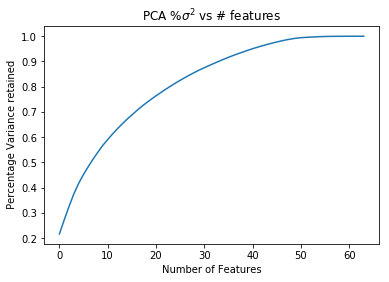

0.951 variance retained in 41 dimensions


In [3]:
# PCA of training set
print 'Performing PCA - Principal Component Analysis'

G, U_reduced = PCA(X, varRetained = 0.95, show = True)

In [4]:
# why? :D
print G
print
print U_reduced

[[ 45.86127719  -1.19211574  21.10005932 ...,   1.08339635   0.27960357
    1.68768446]
 [ 55.52967927   7.86176977 -20.4871986  ...,  -0.2623479    0.72494338
   -1.54482851]
 [ 55.8278837    6.91459576  -9.66245273 ...,   1.0340708    3.325644
    1.46396004]
 ..., 
 [ 65.52698526  10.65872857  -6.2945608  ...,   0.42447577  -1.06720963
    0.53065709]
 [ 58.60616587  -4.9112521   12.72315226 ...,  -0.77783926   0.51014308
   -0.68936325]
 [ 64.44823101  -0.45551347   7.04184347 ...,  -1.06715047   4.76893855
   -0.26638472]]

[[  1.74588012e-18  -6.78969169e-19   1.31513399e-17 ...,   4.13215196e-17
    1.11846999e-17   7.53562180e-17]
 [  5.77192878e-03  -1.73619371e-02  -9.85740003e-03 ...,  -1.05228027e-02
   -6.43467663e-02  -2.29936335e-02]
 [  1.00696020e-01  -2.24200800e-01  -4.48071690e-02 ...,  -9.96581450e-02
    4.26297018e-02  -1.04683652e-01]
 ..., 
 [  1.30885120e-01  -9.01286131e-02   1.83210572e-01 ...,   1.41460626e-01
    6.24506251e-02   2.79911436e-01]
 [  3.9234

<h1 align="center"><h2 align="center">Практическое задание 2 (40%) </h2> </h1>

<h2 align="left">Изучение алгоритмов кластеризации на разных выборках</h2>

### Кластеризация цифр с помощью dbscan
На данных из sklearn.datasets.load_digits примените алгоритмы кластеризации (знания о метках классов при кластеризации использовать нельзя):
 - <a href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN'>dbscan </a> 
 запускайте при различных параметрах eps и minsamples, для всех экспериментов можете выбрать одну метрику (вспомните семинар про  метрические алгоритмы);
 - Используя метки классов цифр, оцените качество различных кластеризаций при помощи Adjusted Mutual Information и Adjusted Rand Index. 
 - визуалируйте изображения тех цифр, которые соответствуют core_points;
 - визуалируйте изображения тех цифр, которые соответствуют выбросам;
 - сделайте выводы и применимости алгоритмов.

### Уменьшение палитры изображения
 - для <a href="https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg"> картинки </a> 
нужно уменьшить число цветов в палитре; для этого нужно выделить кластеры в пространстве RGB, объекты соответствуют пикселам изображения; после выделения кластеров,
все пикселы, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру. 
 - Попробуйте различные алгоритмы кластеризации:
        -- KMeans
        -- MeanShift
        -- AgglomerativeClustering
   Рассмотрите число кластеров K = 2, 3, 10, 20
 - Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи
метрики <a href="http://scikit-image.org/docs/dev/api/skimage.measure.html"> SSIM</a>. Какой способ оказался лучшим?

# Циферки

In [13]:
from sklearn.datasets import load_digits
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score

X, y = load_digits(return_X_y=True)

In [17]:
def n_clusters(eps, min_samples, labels=labels):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
#     core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
#     core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    print('Estimated number of clusters: %d' % n_clusters_)

Посмотрим на число кластеров при разных значениях параметров dbscan'a:

In [18]:
n_clusters(1, 1)
n_clusters(1, 2)
n_clusters(5, 2)
n_clusters(10, 2)
n_clusters(15, 2)
n_clusters(8, 2)
n_clusters(9, 2)
n_clusters(15, 3)
n_clusters(12, 3)
n_clusters(13, 3)
n_clusters(100, 2)
n_clusters(50, 2)
n_clusters(30, 10)
n_clusters(20, 10)
n_clusters(25, 20)
n_clusters(25, 36)
n_clusters(25, 37)
n_clusters(25, 38)
n_clusters(25, 39)
n_clusters(25, 36)
n_clusters(24, 35)
n_clusters(25, 33)
n_clusters(23, 33)
n_clusters(23, 37)
n_clusters(26, 34)
n_clusters(26, 37)
n_clusters(25, 35)
n_clusters(25, 28)

Estimated number of clusters: 1797
Estimated number of clusters: 0
Estimated number of clusters: 0
Estimated number of clusters: 15
Estimated number of clusters: 157
Estimated number of clusters: 3
Estimated number of clusters: 6
Estimated number of clusters: 60
Estimated number of clusters: 14
Estimated number of clusters: 25
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 1
Estimated number of clusters: 14
Estimated number of clusters: 7
Estimated number of clusters: 9
Estimated number of clusters: 9
Estimated number of clusters: 9
Estimated number of clusters: 8
Estimated number of clusters: 9
Estimated number of clusters: 8
Estimated number of clusters: 9
Estimated number of clusters: 6
Estimated number of clusters: 5
Estimated number of clusters: 8
Estimated number of clusters: 9
Estimated number of clusters: 9
Estimated number of clusters: 9


Видим, что при расстоянии порядка 50 все захватывается в один кластер, если увеличивать минимальное число объектов в окрестности, параллельно понижая ее размер, приходим к 9 кластерам при (25,28), что похоже на правду, раз уж мы цифры кластеризуем. Также похожий на правду результат получается при относительно малой окрестности с малым числом соседей - 15 кластеров при (15,2), но все же многовато.

Посмотрим теперь, насколько соотносится с правдой результат, дающий 9 кластеров:

In [8]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=200)
X_tsne = tsne.fit_transform(X)

In [22]:
db = DBSCAN(eps=25, min_samples=28).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

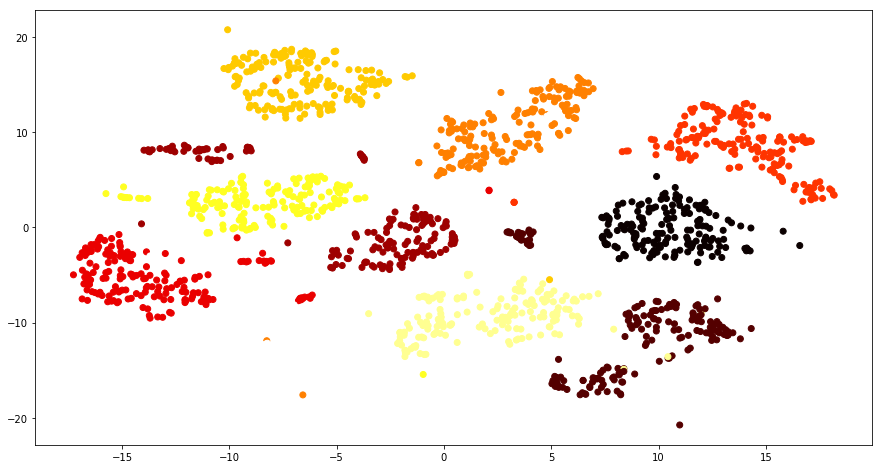

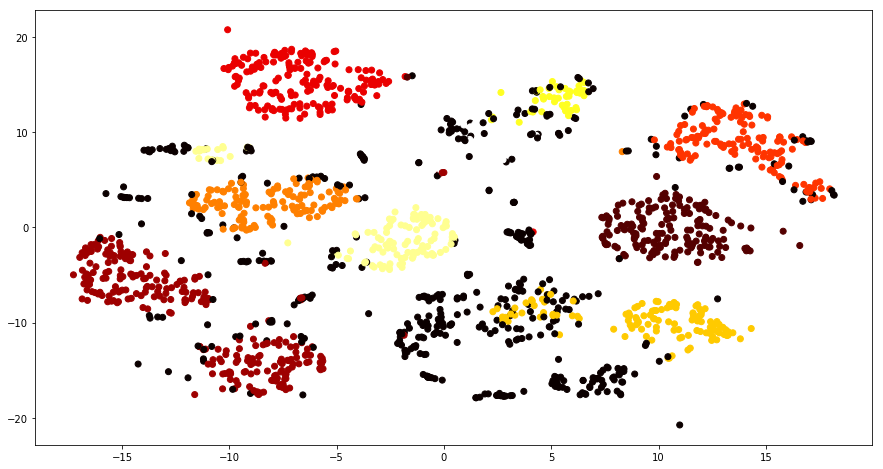

In [23]:
plt.figure(figsize=(15,8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.hot)
plt.show()
plt.figure(figsize=(15,8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap=plt.cm.hot)
plt.show()

В местах со слабой плотностью точек dbscan не может определить их к какому-то кластеру, поэтому получается много черных точек, это можно было бы исправить увеличением радиуса или критерия на кол-во объектов, но это бы привело к большому числу классов.

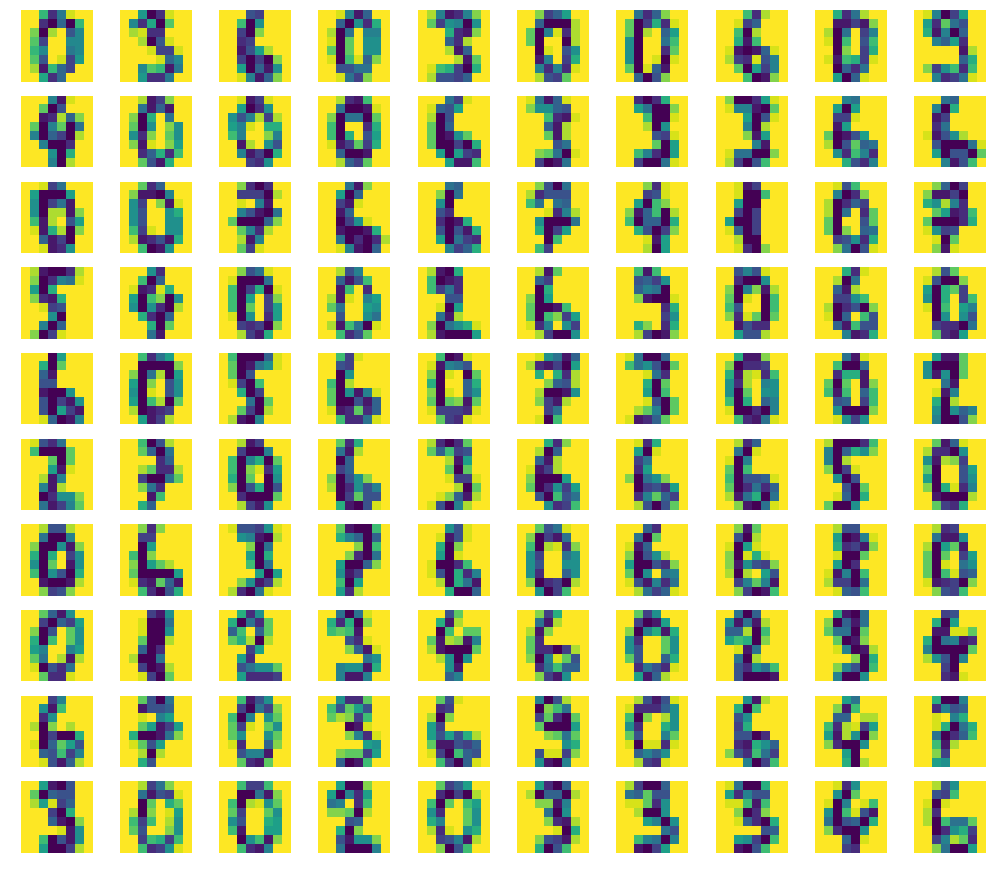

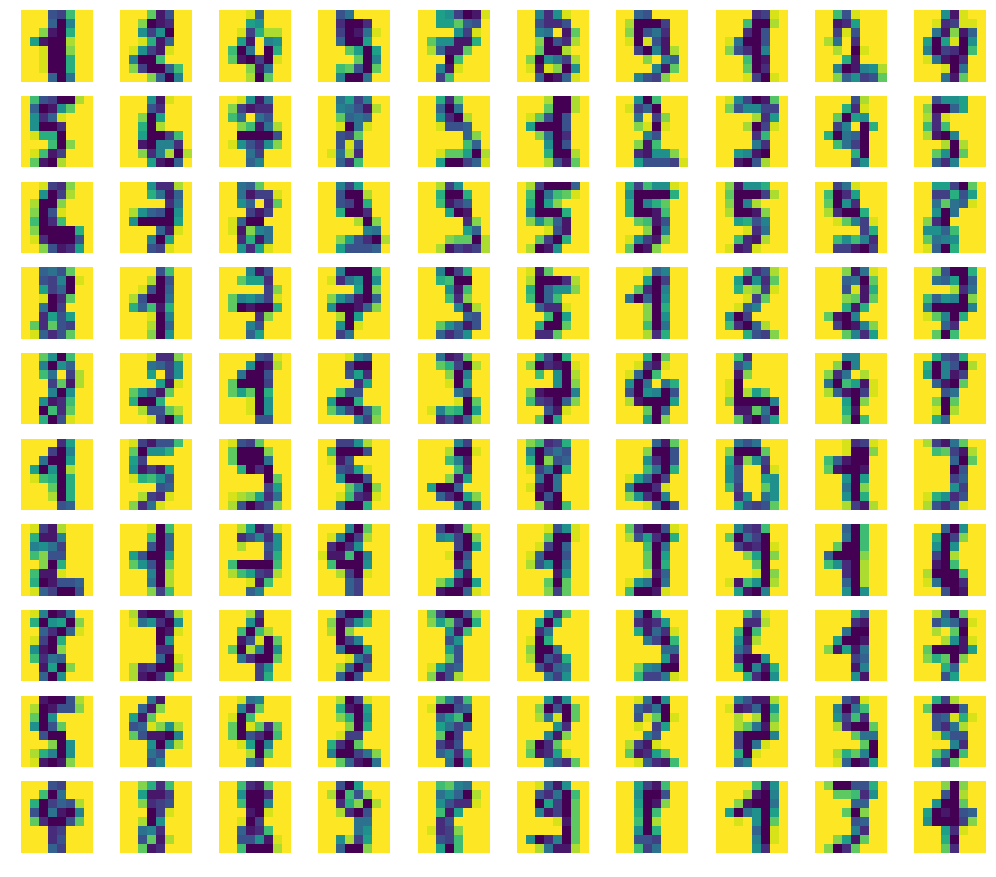

In [24]:
import pylab
from matplotlib import pyplot
%matplotlib inline

X_core = X[core_samples_mask]

def plot_image(image_id, dataset=X, im_size=28):
    plt.imshow(255-dataset[image_id,:].reshape(im_size, im_size))
    
def plot_grid(image_ids, nrows, ncols, dataset=X, im_size=8):
    fig = pyplot.gcf()
    fig.set_size_inches(17.5,15.5)
    for pylab_index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, pylab_index + 1)
        plot_image(example_id, dataset, im_size)
        plt.axis('off')
    plt.show()
    
plot_grid(range(100), nrows=10, ncols=10, dataset=X_core)
X_outter = X[~core_samples_mask]
plot_grid(range(100), nrows=10, ncols=10, dataset=X_outter)

Видим, что неопределенные точки соответствуют в среднем менее читаемым цифрам, чем в core_points.

# Птички

In [25]:
X = plt.imread('ptichki2.png')
X.shape

(1079L, 971L, 3L)

In [26]:
X = X.reshape((-1, 3))

In [27]:
from sklearn.cluster import MiniBatchKMeans

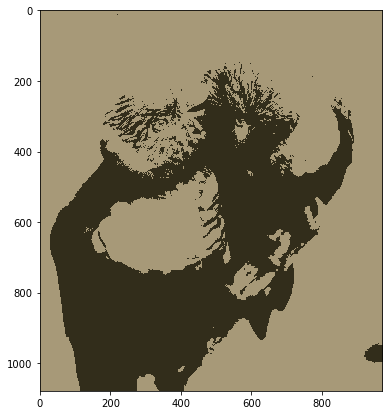

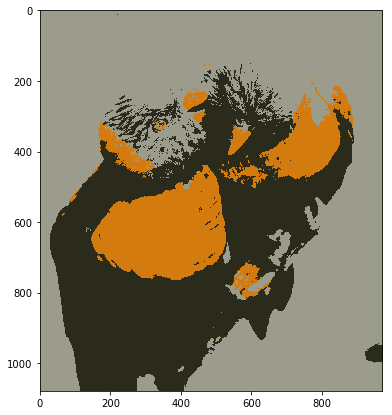

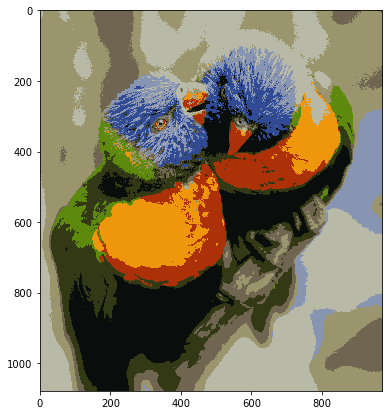

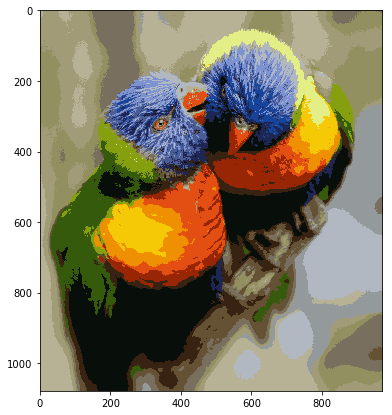

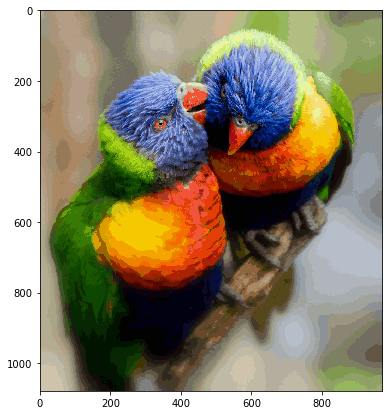

In [28]:
for n_clusters in [2, 3, 10, 20, 100]:
    model = MiniBatchKMeans(n_clusters=n_clusters)
    model.fit(X)
    Y = np.zeros_like(X)
    for k in range(len(X)):
        Y[k] = model.cluster_centers_[model.labels_[k]]
    Y = Y.reshape((1079L, 971L, 3L))
    plt.figure(figsize=(15,7))
    #print X.shape, Y.shape
    plt.imshow(Y)
    plt.show()

^ К А Е Ф 

AgglomerativeClustering -> MemoryError

K-Means -> Half life lasting calculations